In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### train_dat = pd.read_csv("https://www.dropbox.com/s/bawlkeolef1bse2/train_dat.csv?dl=1")
test_dat = pd.read_csv("https://www.dropbox.com/s/rbjatpuk5x7dios/test_dat.csv?dl=1")

print(train_dat.describe())
print(test_dat.describe())
print(train_dat.info())
print(test_dat.info())

# training data normaliseren
df = train_dat 
df_train = (df - df.mean()) / df.std() 
# test data normalizeren
df = test_dat
df_test = (df - df.mean()) / df.std()

TT = train_dat.shape[0]

trainn, validd = train_test_split(df_train, test_size=0.2)
print(trainn,validd)

In [8]:
from tensorflow import keras
from keras import regularizers
keras.backend.clear_session()
# Define the model architecture
model1 = keras.models.Sequential([
    keras.layers.Dense(369, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(269, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(81, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(1)
])

# Print the model summary
#model1.summary()

# Compile the model
optimizer = keras.optimizers.Adam()
model1.compile(loss=keras.losses.MeanAbsoluteError(name='loss'),
              optimizer=optimizer,
              metrics=[keras.metrics.MeanAbsoluteError(name='accuracy')])

num_epochs = 100
batch_sizee = 2^6

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
early_stopping = EarlyStopping(monitor='val_loss', patience = 5) #Defining early stopping parameter (optional, to save time)

#Finally training the model-->
history = model1.fit(
    x=trainn.iloc[:, :-1].values, y=trainn.iloc[:, -1].values,
    epochs = 100,
    callbacks = [early_stopping],
    validation_data=(validd.iloc[:, :-1].values, validd.iloc[:, -1].values)
)

Epoch 1/100
25/25 [==============================] - 1s 7ms/step - loss: 4.5659 - accuracy: 0.3768 - val_loss: 3.8243 - val_accuracy: 0.3076
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 3.2863 - accuracy: 0.2824 - val_loss: 2.7422 - val_accuracy: 0.2346
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 2.4007 - accuracy: 0.2587 - val_loss: 2.0293 - val_accuracy: 0.2385
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 1.7833 - accuracy: 0.2446 - val_loss: 1.5226 - val_accuracy: 0.2263
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 1.3497 - accuracy: 0.2258 - val_loss: 1.1848 - val_accuracy: 0.2260
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 1.0756 - accuracy: 0.2377 - val_loss: 0.9600 - val_accuracy: 0.2400
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.8647 - accuracy: 0.2294 - val_loss: 0.7747 - val_accuracy: 0.2220
Epoch 8/100
2

In [10]:
import matplotlib.pyplot as plt
# plot accuracy and loss
def show_loss_accuracy(history, accuracy_name='accuracy', loss_name='loss'):
  acc = history.history[accuracy_name]
  val_acc = history.history[f'val_{accuracy_name}']
  loss = history.history[loss_name]
  val_loss = history.history[f'val_{loss_name}']

  epochs_range = range(len(acc))

  plt.figure(figsize=(20, 5))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')
  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

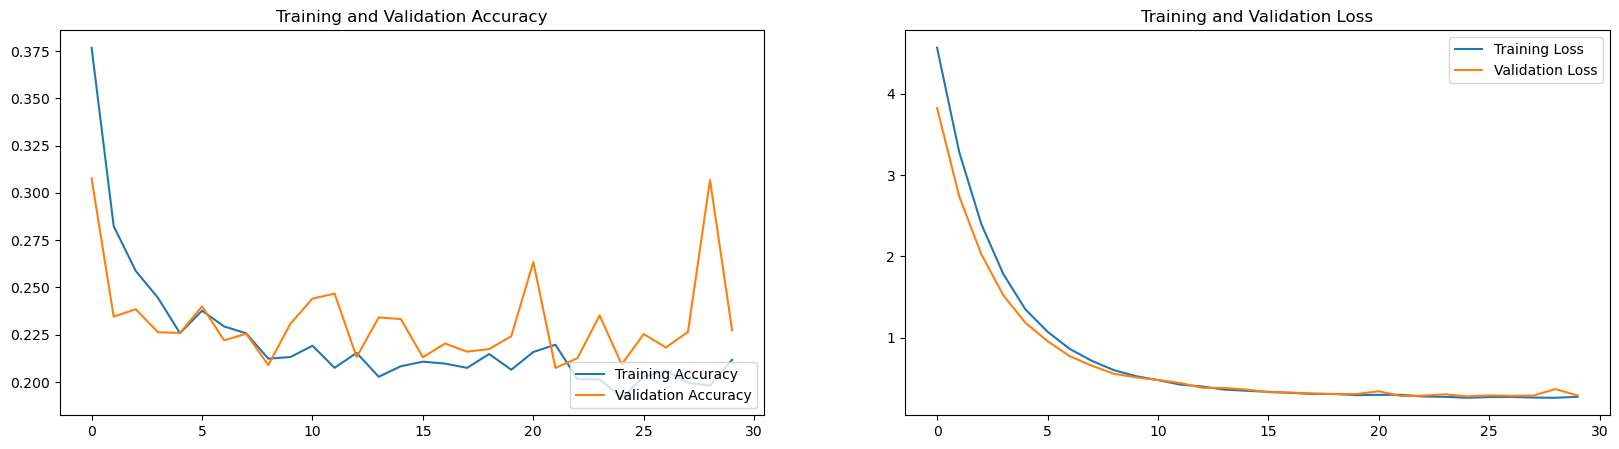

In [11]:
show_loss_accuracy(history)

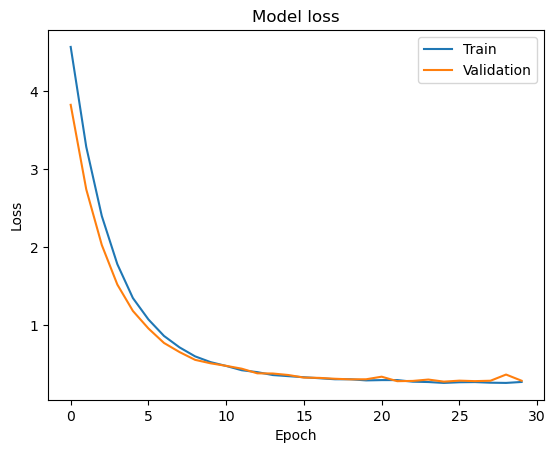

In [12]:
import matplotlib.pyplot as plt
plt.close("all")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [14]:
def rmsle(actual, predicted):
    return np.sqrt(np.mean(np.square(np.log(actual) - np.log(predicted))))

In [ ]:
y_mean = train_dat['y_train'].mean()
y_std = train_dat['y_train'].std()

def convert_label_value(pred):       #Defining a function which will convert the label values back to the original distribution and return it
    return int(pred * y_std + y_mean)

In [17]:
pred_dl = model1.predict(validd.iloc[:, :-1].values)

7/7 [==============================] - 0s 834us/step


In [18]:
rmsle([convert_label_value(y) for y in pred_dl],[convert_label_value(y) for y in validd.iloc[:, -1].values])

0.13637126707679484

In [ ]:
[convert_label_value(y) for y in test_dat.values]
[convert_label_value(y) for y in pred_dl]
trainn.iloc[:, :-1].values

In [50]:
pred_submit = model1.predict(df_test.values)
pred_submit

15/15 [==============================] - 0s 679us/step


array([[-8.33056152e-01],
       [-6.61787331e-01],
       [-4.81104523e-01],
       [-4.89040196e-01],
       [ 7.62752116e-01],
       [-5.89108884e-01],
       [ 1.19882905e+00],
       [-4.71733101e-02],
       [ 3.15730758e-02],
       [-4.01072055e-01],
       [-3.77003014e-01],
       [-6.65892780e-01],
       [-5.23848236e-01],
       [ 1.99169016e+00],
       [-2.21960455e-01],
       [ 4.12527531e-01],
       [ 6.53691769e-01],
       [ 3.53579491e-01],
       [-1.21442294e+00],
       [-1.07105732e+00],
       [-8.69785488e-01],
       [ 2.97053486e-01],
       [-1.73758134e-01],
       [ 7.39940107e-01],
       [-1.56296149e-01],
       [ 1.20960593e+00],
       [-1.58241558e+00],
       [-8.15251410e-01],
       [ 1.76298812e-01],
       [-8.25045288e-01],
       [-2.85588913e-02],
       [ 1.52369633e-01],
       [-7.64302671e-01],
       [ 1.58777583e+00],
       [ 3.91494066e-01],
       [-4.00720298e-01],
       [-4.99034166e-01],
       [-1.15040302e+00],
       [-4.8

In [51]:
pred_submit = np.array([convert_label_value(y) for y in pred_submit])
pred_submit

array([113473, 127042, 141357, 140728, 239903, 132800, 274452, 175736,
       181974, 147697, 149604, 126716, 137970, 337268, 161888, 212156,
       231263, 207486,  83258,  94617, 110563, 203008, 165707, 238096,
       167090, 275306,  54103, 114883, 193441, 114107, 177210, 191545,
       118920, 305267, 210490, 147725, 139936,  88330, 141191,  99821,
       136325, 192070, 181196, 208059, 241818, 193184, 102313, 110530,
        79072, 243346, 222560,  87190, 288827, 192157, 168012, 219848,
       153341, 368645, 155047, 225739, 168421, 162439, 194045, 290145,
       179348, 105689, 129461, 247140, 143438, 136381, 115898, 193084,
       125980, 242168, 113877, 245420, 138496, 138889, 327615, 178878,
       134050, 238240, 187491, 150710, 172103, 264340, 120548,  98473,
       159125, 195872, 165046, 142035, 278872, 237047, 137305, 103245,
        90692, 255596,  97868,  82025, 124020, 188639, 276501, 145261,
        79808,  64250,  88502,  93270, 164601, 398131, 103246, 119474,
      

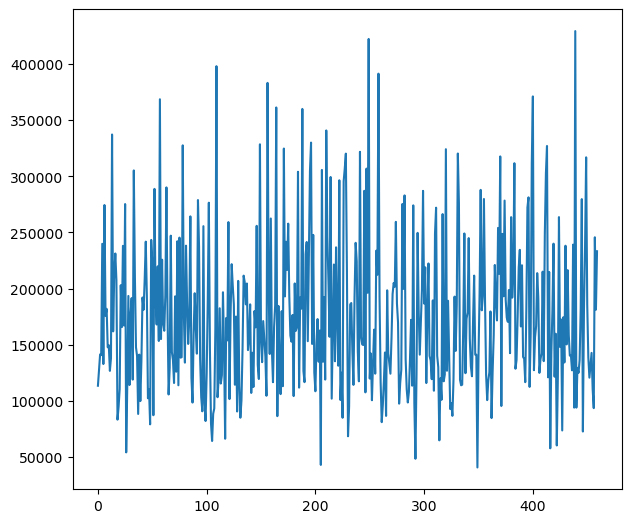

In [52]:
# Cap the predictions at 35000 which is more or less the lower observed in the
pred_submit = np.where(pred_submit < 0, 35000, pred_submit)
plt.close("all")
fig, ax = plt.subplots(figsize=(9, 6))
fig.subplots_adjust(left=0.3, right=0.91, top=0.9, bottom=0.1)
plt.plot(pred_submit)
plt.show()

In [53]:
surname = "alhor" # first team members surname
file_name = surname + '.csv'

In [ ]:
import os
os.getcwd() # check in which folder you are working in (the file you write will bein that folder)
# write.table(pred_submit, file= file_name, row.names = FALSE, col.names = FALSE)
pd.DataFrame(pred_submit).to_csv(file_name, index=False, header=False)
# Check your file
checkk = pd.read_table(file_name)
plt.close("all")
fig, ax = plt.subplots(figsize=(9, 6))
fig.subplots_adjust(left=0.3, right=0.91, top=0.9, bottom=0.1)
plt.plot(checkk)
plt.show()

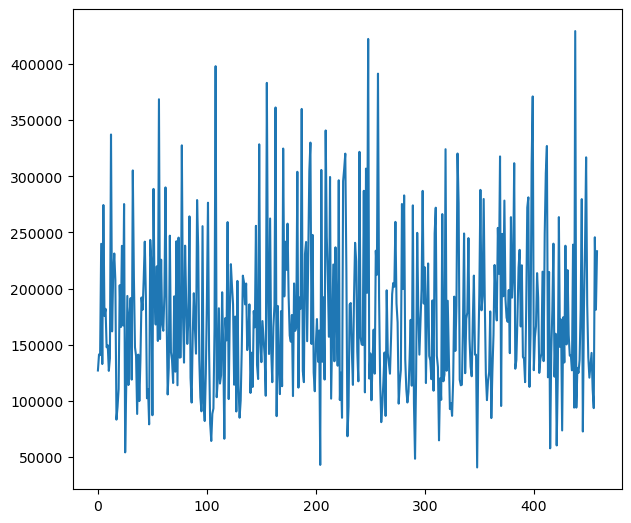

In [55]:
|Your score is|
|:-----------:|
|  0.1440543  |